<a href="https://colab.research.google.com/github/mqquiroz/SWAN/blob/main/SWAN_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://swanmodel.sourceforge.io/download/zip/swan4141.tar.gz
!tar -xzf swan4141.tar.gz
%cd swan4141
!perl switch.pl -unix
!make config
!make ser
%cd ..
!mkdir modelo_SWAN
%cd swan4141
%cp -r 'swan.exe' 'swanrun' '/content/modelo_SWAN'
%cd ..
!rm -r swan4141
!rm swan4141.tar.gz
%cd modelo_SWAN
!chmod +x swanrun swan.exe
#!chmod +rx ./swanrun ./swan.exe
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd ..

--2022-11-24 04:18:34--  https://swanmodel.sourceforge.io/download/zip/swan4141.tar.gz
Resolving swanmodel.sourceforge.io (swanmodel.sourceforge.io)... 104.18.21.229, 104.18.20.229
Connecting to swanmodel.sourceforge.io (swanmodel.sourceforge.io)|104.18.21.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 923828 (902K) [application/x-gzip]
Saving to: ‘swan4141.tar.gz’

swan4141.tar.gz     100%[===================>] 902.18K  --.-KB/s    in 0.1s    

2022-11-24 04:18:35 (6.15 MB/s) - ‘swan4141.tar.gz’ saved [923828/923828]

/content/swan4141
make FOR=gfortran FFLAGS="-O -w -fno-second-underscore " \
        FFLAGS90="-O -w -fno-second-underscore -ffree-line-length-none " \
                INCS="" LIBS="" OBJS="swmod1.o swmod2.o SwanSpectPart.o m_constants.o m_fileio.o serv_xnl4v5.o mod_xnl4v5.o SwanGriddata.o SwanGridobjects.o SwanCompdata.o SdsBabanin.o SwanIEM.o SwanBraggScat.o SwanQCM.o  swan2coh.o swanmain.o swanpre1.o swanpre2.o swancom1.o swancom2.o swan

In [5]:
!wget https://raw.githubusercontent.com/mqquiroz/SWAN/main/Example/Archivos_Tipo.zip
!sudo apt install unzip
!unzip Archivos_Tipo.zip

--2022-11-24 10:54:10--  https://raw.githubusercontent.com/mqquiroz/SWAN/main/Example/Archivos_Tipo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128074 (3.0M) [application/zip]
Saving to: ‘Archivos_Tipo.zip’

Archivos_Tipo.zip   100%[===================>]   2.98M  --.-KB/s    in 0.01s   

2022-11-24 10:54:11 (225 MB/s) - ‘Archivos_Tipo.zip’ saved [3128074/3128074]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Archive:  Archivos_Tipo.zip
   creatin

In [6]:
%cd Archivos_Tipo

/content/Archivos_Tipo


In [7]:
!swanrun -input input.swn -omp 2
!swanrun -input nest1.swn -omp 2
!swanrun -input nest2.swn -omp 2

swan.exe is /content/modelo_SWAN/swan.exe

 SWAN is preparing computation

 iteration    1; sweep 1
+iteration    1; sweep 2
+iteration    1; sweep 3
+iteration    1; sweep 4
 accuracy OK in   0.87 % of wet grid points ( 95.00 % required)

 iteration    2; sweep 1
+iteration    2; sweep 2
+iteration    2; sweep 3
+iteration    2; sweep 4
 accuracy OK in  93.90 % of wet grid points ( 95.00 % required)

 iteration    3; sweep 1
+iteration    3; sweep 2
+iteration    3; sweep 3
+iteration    3; sweep 4
 accuracy OK in  99.06 % of wet grid points ( 95.00 % required)

+SWAN is processing output request    1
+SWAN is processing output request    2
+SWAN is processing output request    3
+SWAN is processing output request    4
+SWAN is processing output request    5
+SWAN is processing output request    6
+SWAN is processing output request    7
+SWAN is processing output request    8
+SWAN is processing output request    9
+SWAN is processing output request   10
  Normal end of run 1   
swan.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#Cargamos batimetrias
x500 = np.arange(-21180,-21180+(314)*500,500)
y500 = np.arange(5806460,5806460 +(220)*500,500)
z500 = np.loadtxt('batg500.bot')
#INPGRID BOTTOM REGULAR -21180 5806460 0.0 313 219 500 500

#INPGRID BOTTOM REGULAR 39720 5820560 0.0 599 412 100 100
x100 = np.arange(39720,39720+(600)*100,100)
y100 = np.arange(5820560,5820560 +(413)*100,100)
z100 = np.loadtxt('batg100.bot')


#INPGRID BOTTOM REGULAR 74019.78 5835480.484 0.0 1026 742 25 25
x25 = np.arange(74019.78,74019.78+(1027)*25,25)
y25 = np.arange(5835480.484,5835480.484 +(743)*25,25)
z25 = np.loadtxt('batg25.bot')

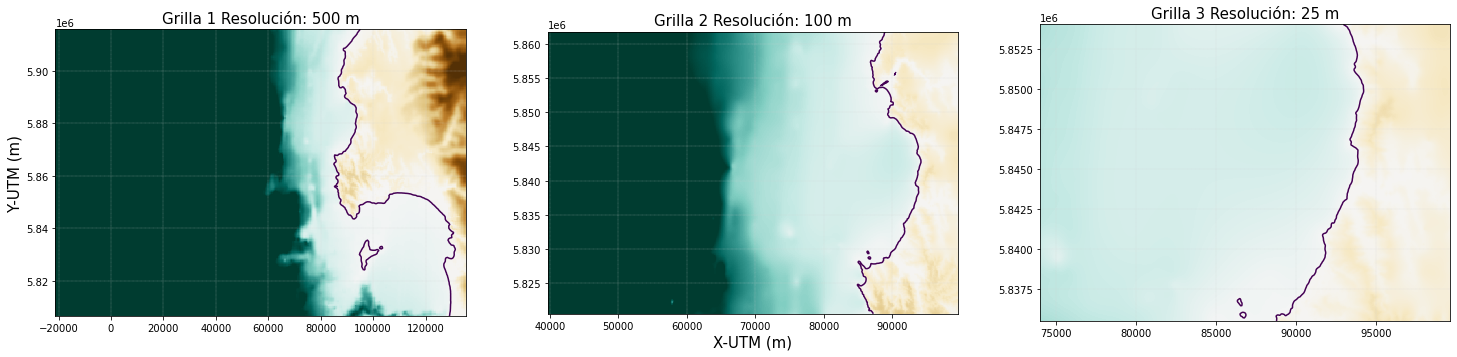

In [35]:
#Creamos el grafico
alto  = 12.5
ancho = 25

fig, ax = plt.subplots(1,3,figsize=(ancho,alto))
ax = ax.ravel()

Z = ['500','100','25']
cmap=plt.cm.BrBG_r

for i in range(len(ax)):
  ax[i].pcolormesh(eval('x'+Z[i]),eval('y'+Z[i]),eval('z'+Z[i]),cmap=cmap,vmin=-1000,vmax=1000)
  ax[i].contour(eval('x'+Z[i]),eval('y'+Z[i]),eval('z'+Z[i]),levels=[0])
  ax[i].set_title('Grilla '+str(i+1)+' Resolución: '+Z[i]+' m',fontsize=15)
  ax[i].set_aspect('equal')
  #ax[i].set_xlim(min(tiempo),max(tiempo))
  ax[i].grid(color='lightgray', linestyle='--', linewidth=0.25)
  if i == 0:
    ax[i].set_ylabel('Y-UTM (m)',fontsize=15)
  elif i == 1:
    ax[i].set_xlabel('X-UTM (m)',fontsize=15)


plt.show()

In [46]:
#Espectro
#Afreq = np.genfromtxt('specin.spc',skip_header=8,skip_footer=137)
Afreq = np.loadtxt('specin.spc',skiprows=8,max_rows=137)
#NDir  = np.genfromtxt('specin.spc',skip_header=139,skip_footer=136)
#E     = np.genfromtxt('specin.spc',skip_header=266)

X, Y = np.meshgrid(NDir,Afreq)
#plt.contourf(NDir,Afreq,E,cmap='jet')
plt.pcolor(NDir,Afreq,E,cmap='jet')
plt.xlim([NDir[0],NDir[119]])
plt.ylim([Afreq[0],Afreq[128]])
plt.xlabel('$\\theta$ ($^{\circ}$)',fontsize=18, color='black')
plt.ylabel('$f$ (Hz)',fontsize=18, color='black')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plot_surface
#ax.contourf(X,Y,E)#,alpha=0.25,edgecolors='k'

ax.plot_surface(X,Y,E,cmap='jet',rstride=1,cstride=1,linewidth=0,antialiased=False)
#ax.plot_wireframe(X,Y,E,rstride=2,cstride=2)
ax.set_title('Espectro Boya')
ax.set_xlabel('$\\theta$ ($^{\circ}$)',fontsize=15)
ax.set_ylabel('$f$ (Hz)',fontsize=15)
ax.set_zlabel('$E$ (m$^2$/Hz/deg)',fontsize=15)
ax.set_xlim([NDir[0],NDir[119]])
ax.set_ylim([Afreq[0],Afreq[128]])

UnicodeDecodeError: ignored

In [2]:
eval('a')

8

In [24]:

np.shape(y)

(220,)